# Numerically solving the Schrodinger Equation

This python notebook will show a simple method to find solutions to the Schrodinger equation using what is called the shooting method. Recall that the Schrodinger equation can be written as:

$$ -\frac{\hbar^2}{2 m} \frac{\partial^2 \psi}{\partial x^2} +(V(x)- E) \psi =0 $$

where $V(x)$ is the potential and both the energy $E$ and the wavefunction $\psi$ are unknown.
The fact that we do not know the eigenvalue $E$ means that we have to use trial and error to guess a value for $E$ and the numerically solve Schrodinger's equation to find $\psi(x)$. We will know if our solution is correct if the wavefunction approaches 0 for large $x$.

To proceed we first change our units so that $\hbar= m=1$ and then add in a new variable $\phi$ which represents the derivative of $\psi$ to give us the set of first order differential equations:

$$ \begin{align}
    \frac{d \psi}{d x} &= \phi(x) \\
    \frac{d \phi}{d x} &= 2(V(x)-E) \psi(x)
    \end{align} $$

Recall that we did the same trick in the Cyclotron Motion notebook to convert the 2nd order differential equations into a set of first order differential equations. This means that we can use the inbuilt functions such as 'odeint' to automatically solve the equations for us.

So first as usual we import the required libraries

In [1]:
from modules.schrodinger import splitdf

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
import pandas as pd

Next we define the range over which we want to find the solutions. For the example below this is taken to be between $-20< x <20$ and we split it up into 2000 points.

In [2]:
start_position = -20.0
end_position   =  20   # set this to be the correct end point.
space_steps    =  2000
step           =  (end_position-start_position)/(space_steps-1)
space          =  np.linspace(start_position, end_position, space_steps)

Next we define our potential function. This can be an arbitrary function but here I have taken it to be a square well with a negative depth and lying symmetrically about $x=0$.

In [3]:
def potential(x, depth, width):  # square well potential
    pot = 0.0
    if abs(x) <= width/2:
        pot = depth
    else:
        pot = 0.0
    return pot

Lets plot the potential so that we know what it looks like.

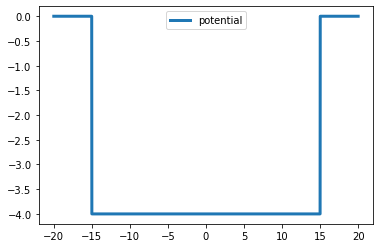

In [4]:
potfun = np.zeros(space_steps)
for ii in range(0, space_steps):
    potfun[ii] = potential(space[ii], -4, 30)

plt.figure()
plt.plot(space, potfun, linewidth=3, label='potential')
plt.legend()
plt.show()

Now we define the derivatives functions for the equations above. These are the equations that we want to solve.

In [5]:
def shoot(yin, position, depth, width, energy):
    return np.array([yin[1], 2.0 * (potential(position, depth, width) - energy) * yin[0]])

Now we still don't know the initial values for $\psi(-20)$ and $\phi(-20)$ since we don't know the energy eigenvalue. However the Schrodinger equation is linear which means that we are free to set $\psi(-20)=1$ since if $\psi(x)$ is a solution so is $\alpha \psi(x)$ for any complex number $\alpha$. We also know that $\psi(x)$ decays exponentially if the energy is less than the potential and that the rate of decay is given by $V(x)-E$. Thus we can approximate the derivative of $psi(x)$ (i.e. $\phi(x)$) as $\phi(x) \approx (V(x)-E) \psi(x)$.

We then guess an energy level $E_g$ which means that the initially
$\phi(-20)=(V(-20)-E_g)$. Since for the square well potential $V(-20)=0$ this just becomes $\phi(-20)=-E_g$.

The Shooting method thus involves guessing an initial value of the energy and integrating the equations to see if it that value is correct. To see this in action let us use a potential well with a depth of -5 and a width of 30. This ensures that there are plenty of solutions to the Schrodinger equation. Our first guess will be that E=-4.9896. 

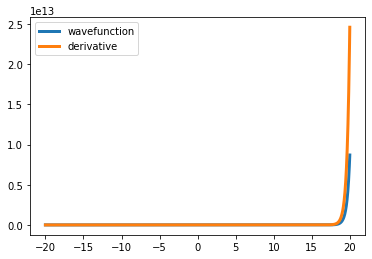

In [6]:
energy_guess = -3.999  # this is our initial guess.
start        = np.array([1.0, -np.sqrt(-energy_guess)])

xout     = odeint(shoot, start, space, args=(-4.0, 30, energy_guess))
xt       = np.transpose(xout)
psi      = xt[0]
psiprime = xt[1]

# Create the matplotlib figure and plot functions
plt.figure()
plt.plot(space, psi,      linewidth = 3, label = 'wavefunction')
plt.plot(space, psiprime, linewidth = 3, label = 'derivative')
plt.legend()
plt.show()

Notice that the solution is clearly wrong since it heads towards $\infty$ for large $x$. So
we can amend our guess of the energy for something larger and try again.

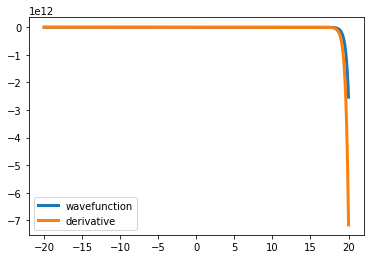

In [7]:
energy_guess = -3.99 # this is our second guess.
start        = np.array([1.0,-np.sqrt(-energy_guess)])

xout     = odeint(shoot, start, space, args=(-4.0, 30, energy_guess))
xt       = np.transpose(xout)
psi      = xt[0]
psiprime = xt[1]

# Create the matplotlib figure and plot functions
plt.figure()
plt.plot(space, psi,      linewidth = 3, label = 'wavefunction')
plt.plot(space, psiprime, linewidth = 3, label = 'derivative')
plt.legend()
plt.show()

Now the solution is still wrong but it heads towards $-\infty$ for large $x$. We can thus say that the correct value for the energy must lie between our two solutions and all we have to do is find it. Trial and error leads to the solution below.

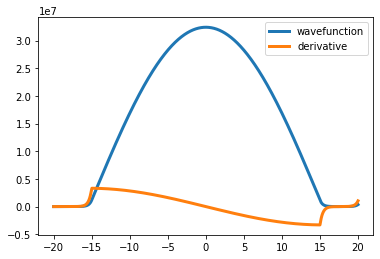

In [8]:
energy_guess = -3.9947665559297138316  # this is ground state
start        =  np.array([1.0, np.sqrt(-energy_guess)])

xout     = odeint(shoot, start, space, args=(-4.0, 30, energy_guess))
xt       = np.transpose(xout)
psi      = xt[0]
psiprime = xt[1]

# Create the matplotlib figure and plot functions
plt.figure()
plt.plot(space, psi,      linewidth = 3, label = 'wavefunction')
plt.plot(space, psiprime, linewidth = 3, label = 'derivative')
plt.legend()
plt.show()

Note that as expected the ground state wavefunction has a single maximum and goes to zero as the distance from the well increases. It is clear however that the wavefunction is not normalised i.e. the integral of $|\psi(x)|^2 \neq 1$. However since this is just a number we can easily calculate the integral of the solution above and divide through by that to normalise everything.




In [9]:
def normalise(y, step):  # a quick and dirty integrator that is good enough.
    out = 0.0
    for ii in range(0, len(y)):
        out = out + y[ii] ** 2
    return np.sqrt(out * step)

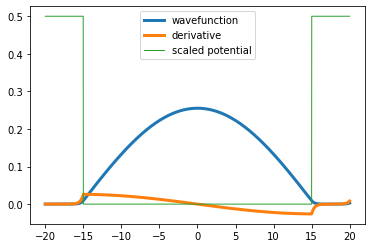

In [10]:
result   = normalise(psi, step)

psi      = psi / result
psiprime = psiprime / result

# Create the matplotlib figure and plot functions
plt.figure()
plt.plot(space, psi,      linewidth = 3, label = 'wavefunction')
plt.plot(space, psiprime, linewidth = 3, label = 'derivative')
# Show the potential well as well
plt.plot(space, potfun/8+0.5, linewidth = 1, label = 'scaled potential') 
plt.legend()
plt.show()

A bit more trial and error leads to the next guess for the energy of the first higher order state.

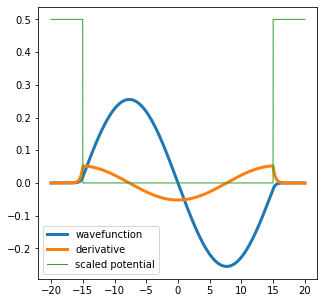

In [11]:
energy_guess = -3.9790668560912517  # this is first higher order state
start        =  np.array([1.0, np.sqrt(-energy_guess)])

xout     = odeint(shoot, start, space, args=(-4.0, 30, energy_guess))
xt       = np.transpose(xout)
psi      = xt[0]
psiprime = xt[1]
result   = normalise(psi, step)

psi      = psi / result
psiprime = psiprime / result

# Create the matplotlib figure and plot functions
plt.figure(figsize = [5,5])
plt.plot(space, psi,      linewidth = 3, label = 'wavefunction')
plt.plot(space, psiprime, linewidth = 3, label = 'derivative')
# Show the potential well as well
plt.plot(space, potfun/8+0.5, linewidth = 1, label = 'scaled potential') 
plt.legend()
plt.show()

It very quickly gets complicated to continually bisect the interval to find new
solutions. However it is fairly easy to write a program that does that for us. There are lots of different ways of doing so since it is the same as finding the zero of a function but this is perhaps the simplest. We start with two values $E_1$ and $E_2$ which have the property that
the solution to the equation goes to $\pm \infty$ for the two values and then we look at the
sign of the solution at the midpoint.

If the sign of the solution at the midpoint is the same value as $E_1$ we replace $E_1$ by
$(E_1+E_2)/2$ and start again. Otherwise we replace $E_2$ by the midpoint and start again. 
Each time we do this the size of the interval decreases by a factor of 2 so we can continue doing it for as long as we like. In practice we stop when we run out of numerical precision.


In [12]:
def find(start,stop): 
    """Finds where our system of equations are satisfied by a wavefunction
        with an energy between start and stop through the bisection method.
    
    Make sure that the solution goes in different directions for the two values of start and stop.
    
    Parameters:
    -----------
        start : float64
            A lower bound for energy.
        stop  : float64
            An upper bound for energy.
            
    Prints:
    -----------
        output : pandas dataframe
            This stores the values of out1, out2 and out3 as the code iterates,
            The pandas dataframe allows for aesthetic printing of values.
            
    Returns:
    -----------
        guess : float64
            A guess as to what value the function shoot will return zero.
            This will be between the values of "start" and "stop".
    """
    # out1 is the final value of our trial solution for the guess Energy = start
    # the element [-1][0] picks the last element in the array.
    # out2 is the final value of our trial solution for the guess Energy = stop.
    # guess is the midpoint of the interval.
    # out3 is the final value of the trial solution for the guess Energy = guess.
    
    
    
    def step(start, stop, output, count):
        """Runs for each step of this method"""
        out1  = odeint(shoot, np.array([1.0, np.sqrt(-start)]), space, args = (-4.0, 30, start))[-1][0]
        out2  = odeint(shoot, np.array([1.0, np.sqrt(-stop)]),  space, args = (-4.0, 30, stop ))[-1][0]
        guess = (stop + start) / 2.0
        out3  = odeint(shoot, np.array([1.0, np.sqrt(-guess)]), space, args = (-4.0, 30, guess))[-1][0]
        
        output.iloc[count] = [out1, out2, out3, start, stop, guess]
        
        # Assigning the new start and stop values
        if np.sign(out1) == np.sign(out3):
            start = guess
        else:
            stop  = guess
        
        return start, stop, output
    
    
    
    output = pd.DataFrame(columns = ['out1','out2','out3', 'start', 'stop', 'guess'], index = range(50))
    
    for count in range(50):
        start, stop, output = step(start, stop, output, count)
    
    return output

Let us see it in action

In [13]:
splitdf(find(-3.95, -3.979), n=2)

,out1,out2,out3,start,stop,guess
0,-1.74497e+12,1.05633e+11,7.29901e+12,-3.95,-3.979,-3.9645
1,-1.74497e+12,7.29901e+12,2.95391e+12,-3.95,-3.9645,-3.95725
2,-1.74497e+12,2.95391e+12,4.71129e+11,-3.95,-3.95725,-3.95363
3,-1.74497e+12,4.71129e+11,-6.86147e+11,-3.95,-3.95363,-3.95181
4,-6.86147e+11,4.71129e+11,-1.18073e+11,-3.95181,-3.95363,-3.95272
5,-1.18073e+11,4.71129e+11,1.74115e+11,-3.95272,-3.95363,-3.95317
6,-1.18073e+11,1.74115e+11,2.73871e+10,-3.95272,-3.95317,-3.95295
7,-1.18073e+11,2.73871e+10,-4.55053e+10,-3.95272,-3.95295,-3.95283
8,-4.55053e+10,2.73871e+10,-9.0993e+09,-3.95283,-3.95295,-3.95289
9,-9.0993e+09,2.73871e+10,9.13389e+09,-3.95289,-3.95295,-3.95292


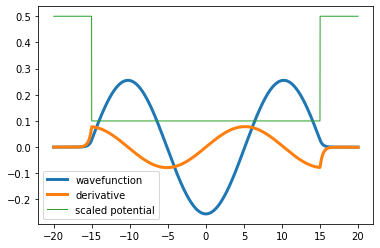

In [14]:
def plot_wavefunctions(energy_guess):
    start = np.array([1.0, np.sqrt(-energy_guess)])

    xout     = odeint(shoot, start, space, args=(-4.0, 30, energy_guess))
    xt       = np.transpose(xout)
    psi      = xt[0]
    psiprime = xt[1]
    result   = normalise(psi, step)

    psi      = psi / result
    psiprime = psiprime / result

    # Plotting
    plt.figure()
    plt.plot(space, psi,      linewidth = 3, label = 'wavefunction')
    plt.plot(space, psiprime, linewidth = 3, label = 'derivative')
    plt.plot(space, potfun/10 + 0.5, linewidth = 1, label = 'scaled potential') # show the potential well as well
    plt.legend()
    plt.show()
    
energy_guess = -3.952902809182185  # this is 2nd higher order state
plot_wavefunctions(energy_guess)

In [15]:
splitdf(find(-2.80, -2.90), n=2)

,out1,out2,out3,start,stop,guess
0,-8.62729e+09,2.74826e+10,1.04639e+10,-2.8,-2.9,-2.85
1,-8.62729e+09,1.04639e+10,-2.13682e+08,-2.8,-2.85,-2.825
2,-2.13682e+08,1.04639e+10,4.98109e+09,-2.825,-2.85,-2.8375
3,-2.13682e+08,4.98109e+09,2.32748e+09,-2.825,-2.8375,-2.83125
4,-2.13682e+08,2.32748e+09,1.04055e+09,-2.825,-2.83125,-2.82812
5,-2.13682e+08,1.04055e+09,4.09075e+08,-2.825,-2.82812,-2.82656
6,-2.13682e+08,4.09075e+08,9.65752e+07,-2.825,-2.82656,-2.82578
7,-2.13682e+08,9.65752e+07,-5.88381e+07,-2.825,-2.82578,-2.82539
8,-5.88381e+07,9.65752e+07,1.87975e+07,-2.82539,-2.82578,-2.82559
9,-5.88381e+07,1.87975e+07,-2.0039e+07,-2.82539,-2.82559,-2.82549


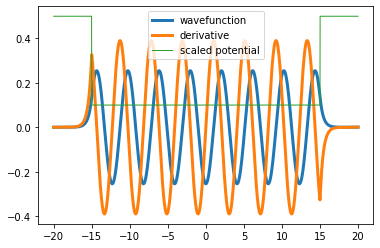

In [16]:
energy_guess = -2.825538679175513  # which state is this?
plot_wavefunctions(energy_guess)

## Simple Harmonic Potential

In class we have also looked at a harmonic potential well defined by

$$ V(x) =\frac{x^2}{w^2} $$

where $w$ defines the steepness of the well. We can easily adapt our code to find the wavefunctions for this case as well.  

In [17]:
def potential2(x, width):  # harmonic potential well
    return x ** 2 / (width ** 2)

potfun2 = np.zeros(space_steps)

for ii in range(0, space_steps):
    potfun2[ii] = potential2(space[ii], 10)
    
def shoot2(yin, position, width, energy):
    return np.array([yin[1], 2.0 * (potential2(position, width) - energy) * yin[0]])

In [18]:
def find_harmonic(start, stop, width): 
    """Finds where the function shoot has the value 0 through the bisection method.
    
    Make sure that the solution goes in different directions for the two values of start and stop.
    
    Parameters:
    -----------
        start : float64
            A lower bound.
        stop  : float64
            An upper bound.
            
    Prints:
    -----------
        output : pandas dataframe
            This stores the values of out1, out2 and out3 as the code iterates,
            The pandas dataframe allows for aesthetic printing of values.
            
    Returns:
    -----------
        guess : float64
            A guess as to what value the function shoot will return zero.
            This will be between the values of "start" and "stop".
    """
    # out1 is the final value of our trial solution for the guess Energy = start
    # the element [-1][0] picks the last element in the array.
    # out2 is the final value of our trial solution for the guess Energy = stop.
    # guess is the midpoint of the interval.
    # out3 is the final value of the trial solution for the guess Energy=guess.
    
    def step(start, stop, width, output, count):
        out1  = odeint(shoot2, np.array([1.0, np.sqrt(potential2(-20, width) - start)]), space, args=(width, start))[-1][0]
        out2  = odeint(shoot2, np.array([1.0, np.sqrt(potential2(-20, width) - stop )]), space, args=(width, stop ))[-1][0]
        guess = (stop + start) / 2.0
        out3  = odeint(shoot2, np.array([1.0, np.sqrt(potential2(-20, width) - guess)]), space, args=(width, guess))[-1][0]

        output.iloc[count] = [out1, out2, out3, start, stop, guess]
        
        if np.sign(out1) == np.sign(out3):
            start = guess
        else:
            stop = guess
        return start, stop, width, output, count
    
    
    output = pd.DataFrame(columns = ['out1','out2','out3', 'start', 'stop', 'guess'], index = range(50))
    
    for count in range(50):
        start, stop, width, output, count = step(start, stop, width, output, count)
        
    return output

In [19]:
splitdf(find_harmonic(0, 0.2, 10), n = 2)

,out1,out2,out3,start,stop,guess
0,4.46476e+24,-8.23049e+20,-4.95874e+22,0,0.2,0.1
1,4.46476e+24,-4.95874e+22,2.33367e+23,0,0.1,0.05
2,2.33367e+23,-4.95874e+22,-1.92456e+22,0.05,0.1,0.075
3,2.33367e+23,-1.92456e+22,5.87244e+22,0.05,0.075,0.0625
4,5.87244e+22,-1.92456e+22,1.11243e+22,0.0625,0.075,0.06875
5,1.11243e+22,-1.92456e+22,-5.87695e+21,0.06875,0.075,0.071875
6,1.11243e+22,-5.87695e+21,2.13105e+21,0.06875,0.071875,0.0703125
7,2.13105e+21,-5.87695e+21,-1.99109e+21,0.0703125,0.071875,0.0710938
8,2.13105e+21,-1.99109e+21,3.98347e+19,0.0703125,0.0710938,0.0707031
9,3.98347e+19,-1.99109e+21,-9.83084e+20,0.0707031,0.0710938,0.0708984


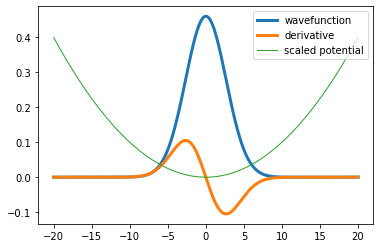

In [20]:
def plot_wavefunctions2(energy_guess, scale = 10, ylims = None):
    start    = np.array([1.0, np.sqrt(potential2(-20, 10) - energy_guess)])
    xout     = odeint(shoot2, start, space, args = (10, energy_guess))
    xt       = np.transpose(xout)
    psi      = xt[0]
    psiprime = xt[1]
    result   = normalise(psi, step) 
    psi      = psi / result       # again we normalise the solution.
    psiprime = psiprime / result

    plt.figure()
    plt.plot(space, psi,       linewidth=3, label = 'wavefunction')
    plt.plot(space, psiprime,  linewidth=3, label = 'derivative')
    plt.plot(space, potfun2/scale, linewidth=1, label = 'scaled potential') #show the potential well as well
    if ylims != None:
        plt.ylim(*ylims)
    plt.legend()
    plt.show()
    
energy_guess = 0.07071067758588272  #this is a higher order state
plot_wavefunctions2(energy_guess)

It can be seen that this looks like the ground state solution to Schrodinger's equation. It is symmetric about $x=0$ and has a single maximum. Note that as before we normalise the solution.

If our method works then we should be able to find the next solution which will be anti-symmetric with $\psi(0)=0$ and have two extrema. So lets try a new guess.

In [21]:
splitdf(find_harmonic(0.1, 0.5, 10), n = 2)

,out1,out2,out3,start,stop,guess
0,-4.95874e+22,1.08366e+17,1.55763e+20,0.1,0.5,0.3
1,-4.95874e+22,1.55763e+20,-8.23049e+20,0.1,0.3,0.2
2,-8.23049e+20,1.55763e+20,5.17976e+20,0.2,0.3,0.25
3,-8.23049e+20,5.17976e+20,4.09213e+20,0.2,0.25,0.225
4,-8.23049e+20,4.09213e+20,1.72681e+19,0.2,0.225,0.2125
5,-8.23049e+20,1.72681e+19,-3.3274e+20,0.2,0.2125,0.20625
6,-3.3274e+20,1.72681e+19,-1.42144e+20,0.20625,0.2125,0.209375
7,-1.42144e+20,1.72681e+19,-5.87665e+19,0.209375,0.2125,0.210938
8,-5.87665e+19,1.72681e+19,-1.98587e+19,0.210938,0.2125,0.211719
9,-1.98587e+19,1.72681e+19,-1.07606e+18,0.211719,0.2125,0.212109


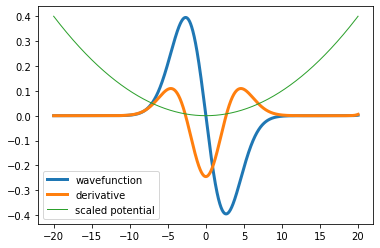

In [22]:
energy_guess = 0.21213203429823696  # this is the second eigenvalue
plot_wavefunctions2(energy_guess)

Again our code has found the solution that we expect. We can see that it is quite a bit wider than the fundamental solution. We have scaled the potential by a factor of 4 so that it fits nicely on the graph. We can carry on and find the next solution.

In [23]:
splitdf(find_harmonic(0.25, 0.6, 10), n = 2)

,out1,out2,out3,start,stop,guess
0,5.17976e+20,6.83957e+16,-6.15917e+18,0.25,0.6,0.425
1,5.17976e+20,-6.15917e+18,2.10088e+19,0.25,0.425,0.3375
2,2.10088e+19,-6.15917e+18,-1.09089e+19,0.3375,0.425,0.38125
3,2.10088e+19,-1.09089e+19,-4.3282e+18,0.3375,0.38125,0.359375
4,2.10088e+19,-4.3282e+18,5.09e+18,0.3375,0.359375,0.348438
5,5.09e+18,-4.3282e+18,-3.04135e+17,0.348438,0.359375,0.353906
6,5.09e+18,-3.04135e+17,2.20657e+18,0.348438,0.353906,0.351172
7,2.20657e+18,-3.04135e+17,9.06571e+17,0.351172,0.353906,0.352539
8,9.06571e+17,-3.04135e+17,2.90294e+17,0.352539,0.353906,0.353223
9,2.90294e+17,-3.04135e+17,-9.62245e+15,0.353223,0.353906,0.353564


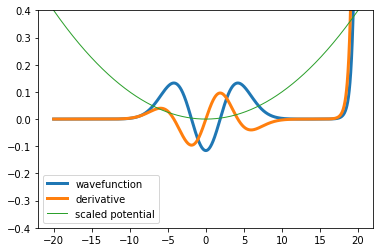

In [24]:
energy_guess = 0.35355339015204545  # this is a higher order state
plot_wavefunctions2(energy_guess, ylims = [-0.4,0.4])

We know for the harmonic potential the eigenvalues are evenly spaced. In our case the spacing is about $\sqrt{2}/10$ so we expect the next solution to be at 0.49497474683058326708.

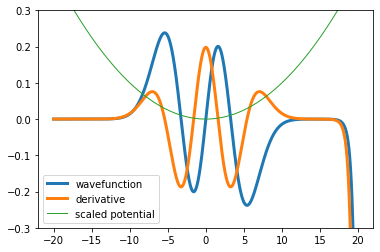

In [25]:
energy_guess = 0.49497474683058326708  #no need to use find now since we know the energy spacing.
plot_wavefunctions2(energy_guess, ylims = [-0.3,0.3])